In [1]:
import pandas as pd
import  numpy as  np
import matplotlib.pyplot  as  plt
import seaborn  as  sns
from sklearn.cluster  import KMeans

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape # Check the number of rows  and  columns

(200, 5)

In [5]:
df.dtypes   #  Checking the  datatype  for  each  column

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

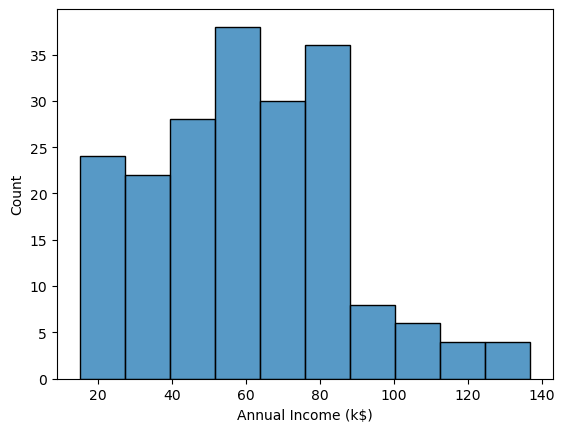

In [7]:
sns.histplot(df['Annual Income (k$)'])

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

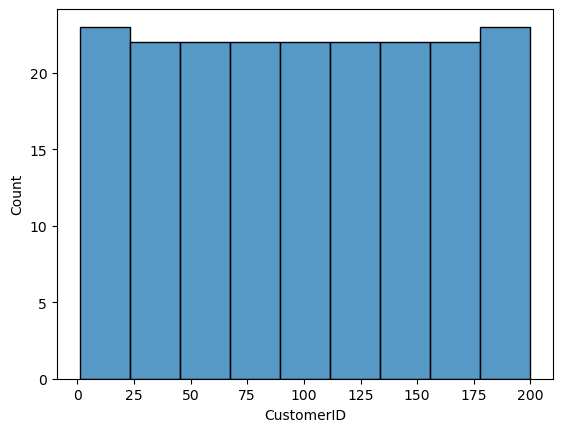

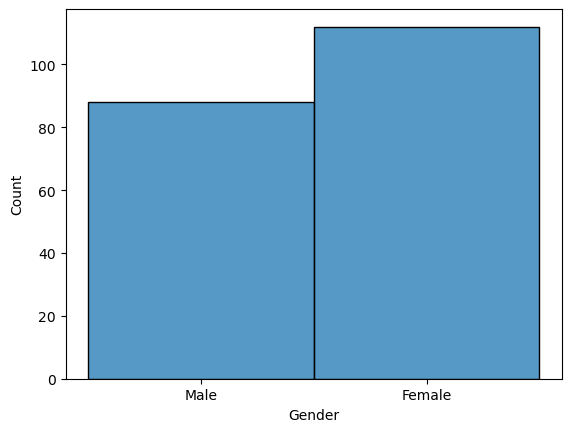

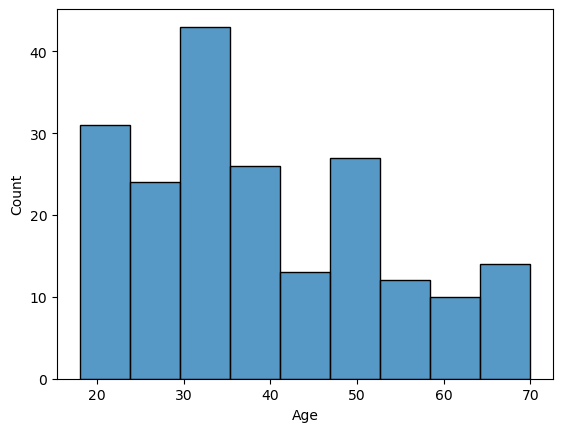

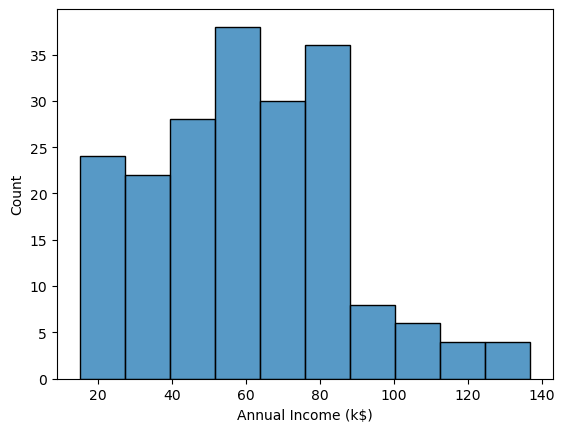

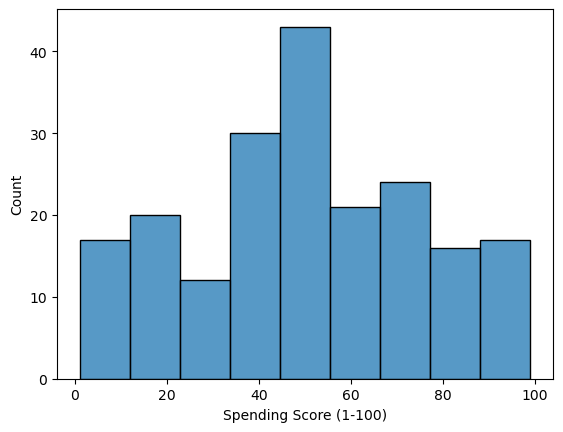

In [9]:
# Using  function to draw the histogram  for each  column

cols=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.histplot(df[i])

C:\Users\HP\AppData\Local\Temp\ipykernel_1172\2990425741.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Annual Income (k$)'], shade= True)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

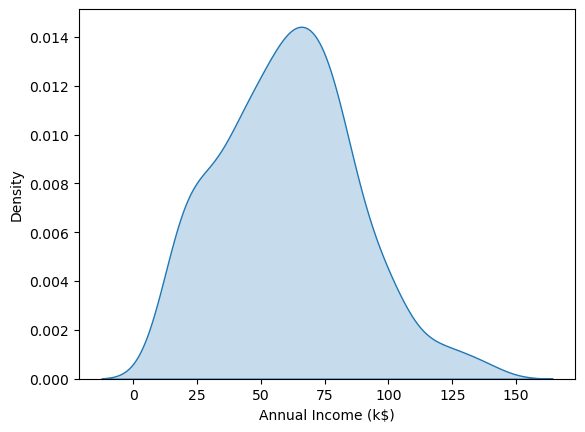

In [10]:
sns.kdeplot(df['Annual Income (k$)'], shade= True)

In [11]:
## Using function to  find the KDE   for each columns
#Kernel Density Estimation (KDE) is a non-parametric method to estimate the probability density function of a random variable.

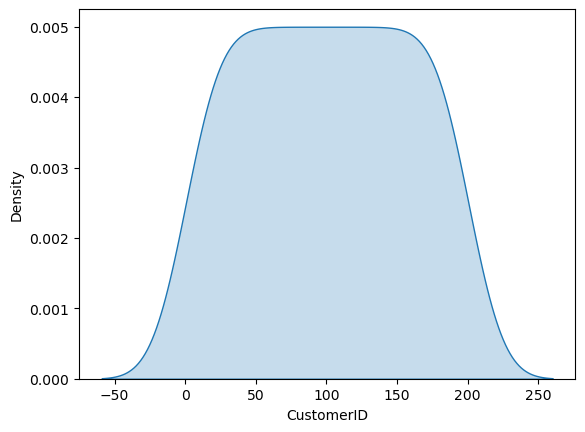

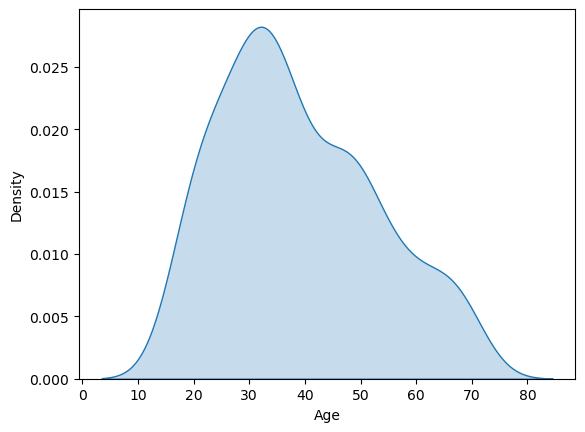

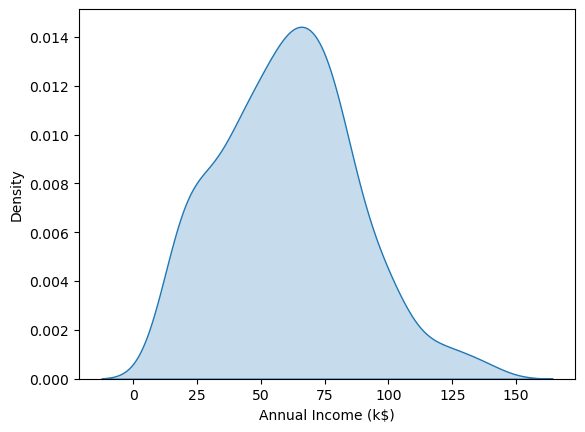

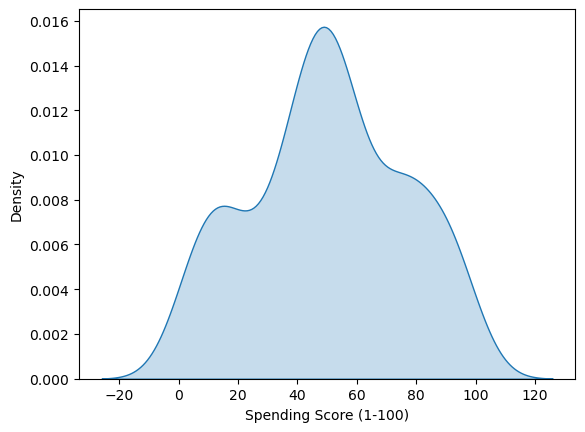

In [12]:
import warnings
warnings.filterwarnings("ignore")
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for x in cols:
    plt.figure()
    sns.kdeplot(df[x],shade=True)

Boxplots are particularly useful for identifying skewed data, comparing distributions between groups, and spotting potential outliers. They provide a quick and informative summary of the data's central tendency and spread.

Box: The box in the middle represents the interquartile range (IQR), which spans from the 25th percentile (Q1) to the 75th percentile (Q3). This range contains the middle 50% of the data.
Line in the Box: The line inside the box represents the median, which is the middle value when the data is sorted.

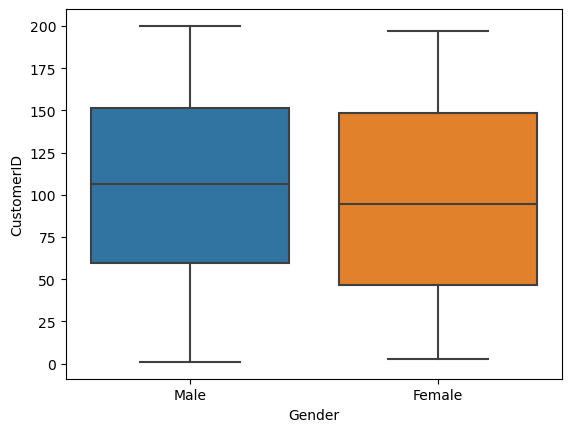

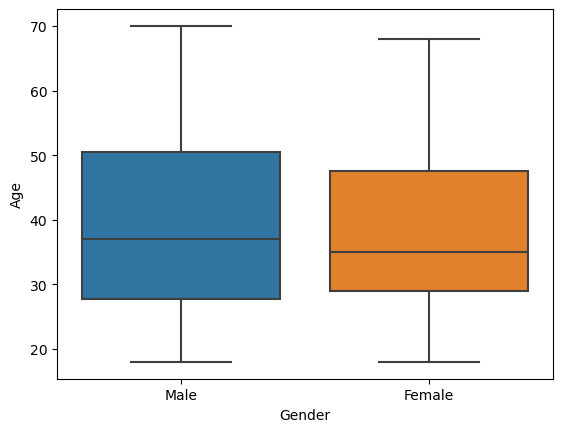

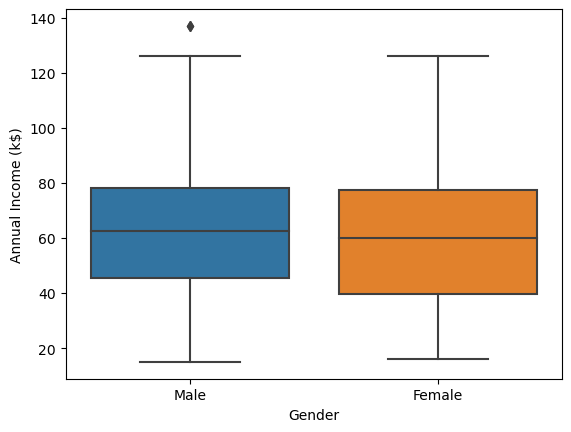

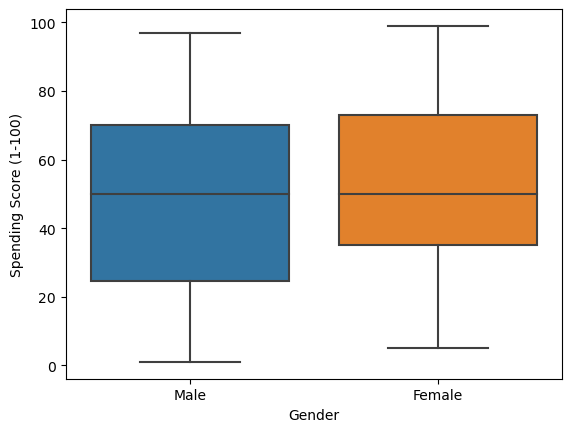

In [13]:
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.boxplot(data =df, x='Gender',y=df[i])

Scatter plots are useful for visually assessing the relationship between two variables, identifying patterns, and gaining insights into the nature of their association.
Each point on the scatter plot represents a unique observation in your dataset.
If the points on the scatter plot generally move from the bottom left to the top right, it indicates a positive correlation—increases in one variable correspond to increases in the other.
If the points move from the top left to the bottom right, it indicates a negative correlation—increases in one variable correspond to decreases in the other.
The tighter the points are clustered around the trend line, the stronger the relationship between the variables.
If the points are more spread out, the relationship may be weaker.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

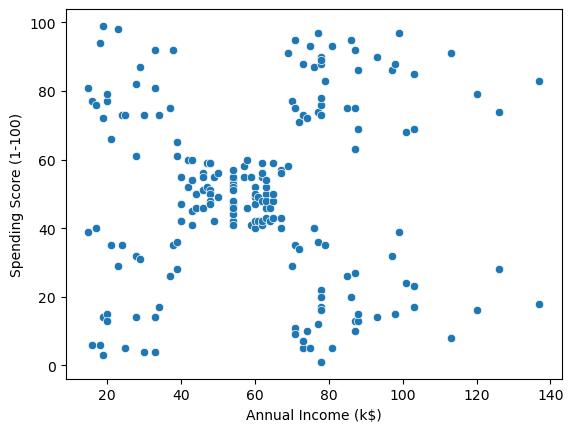

In [14]:
# Starting with making the  scatter plot for our parameters
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

<b>Pairplot: </b><br>
A pairplot visualizes the bivariate relationship between each pair of features in a dataset. For example, if you have features X, Y, and Z about your data points, a pairplot will display X vs Y, X vs Z, and Y vs Z in individual plots organized in a grid

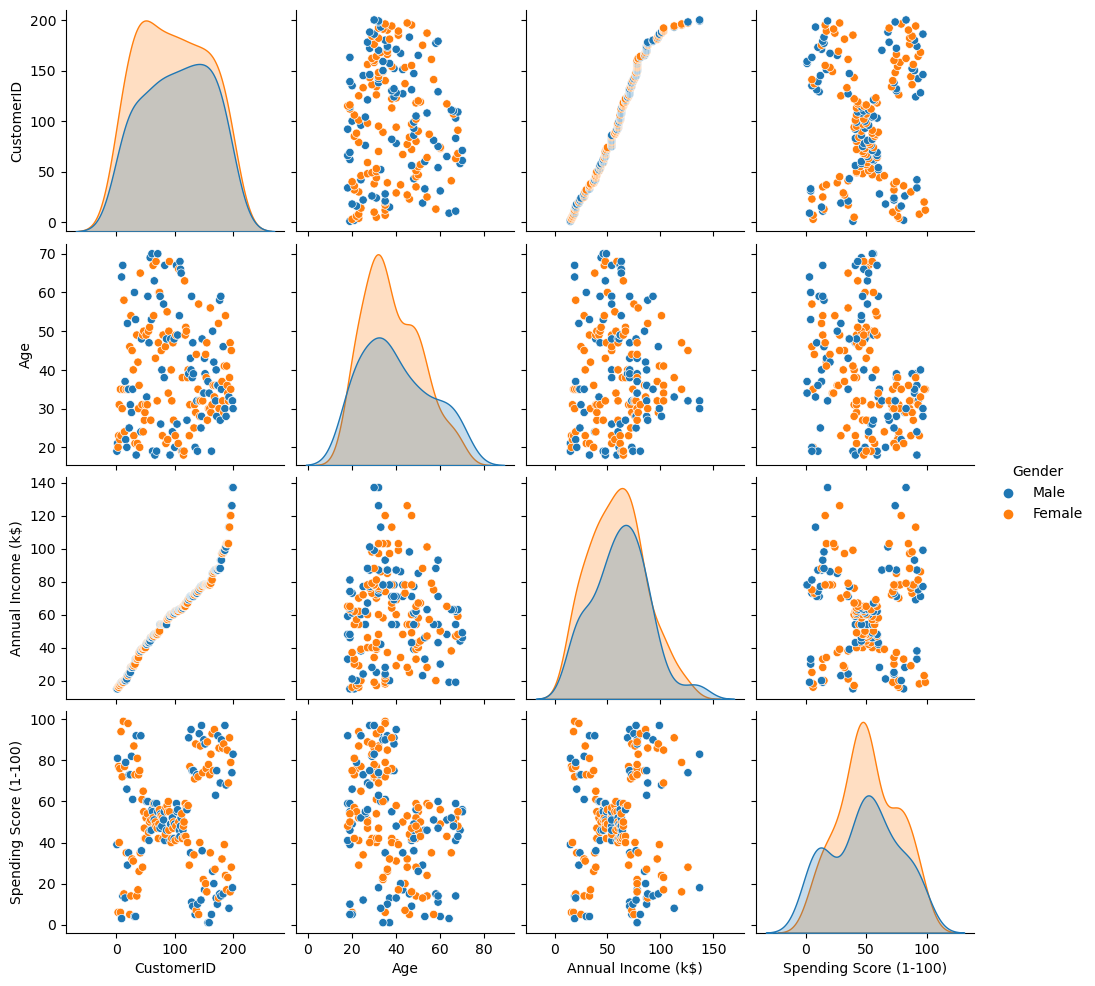

In [15]:
sns.pairplot(df,hue='Gender')

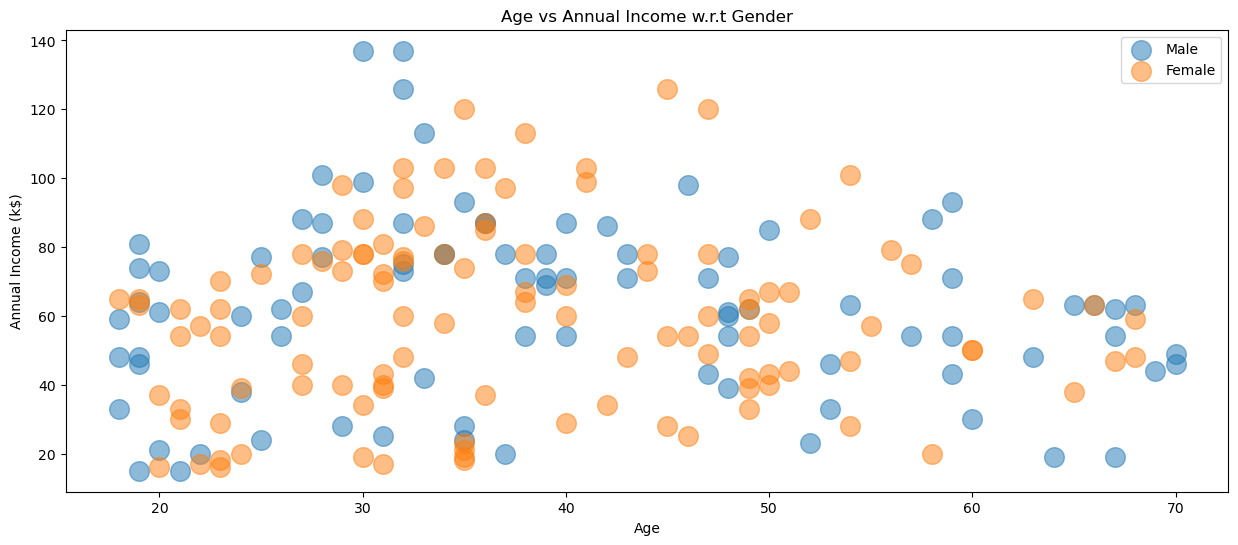

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Stripplot:
The strip plot is similar to a scatter plot. It is often used along with other kinds of plots for better analysis. It is used to visualize the distribution of data points of the single continuous variable for one or more categorical variables using vertical strips. So you select one continuous column to plot on the y-axis as dots representing data points. The x-axis contains distinct categories.

The sns.striplot ( ) function is used to plot a strip-plot 

It also helps to plot the distribution of variables for each category as individual data points

<Axes: ylabel='Age'>

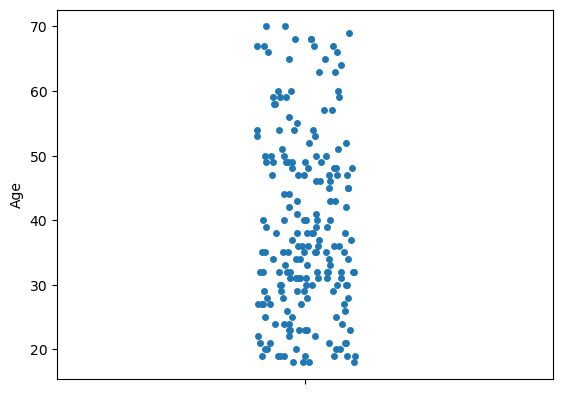

In [17]:
sns.stripplot(y=df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

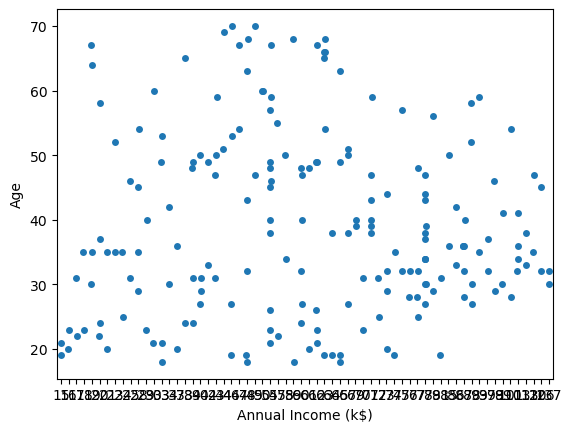

In [18]:
sns.stripplot(x= df['Annual Income (k$)'], y=df['Age'])

# Correlation

<Axes: >

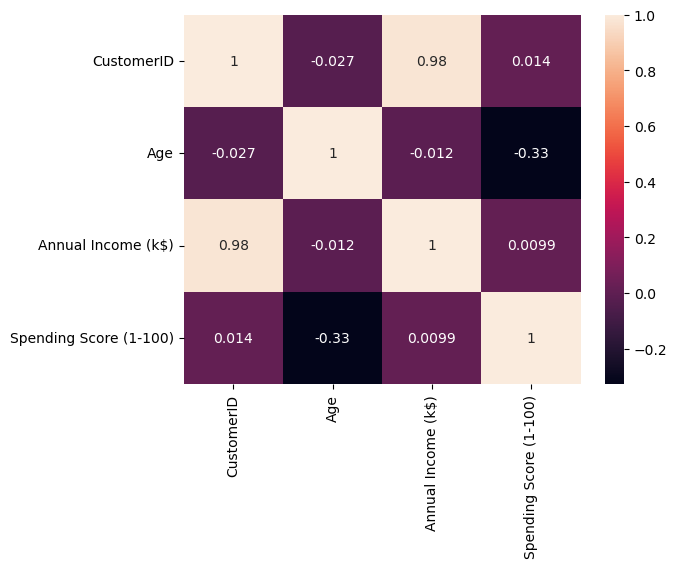

In [19]:
sns.heatmap(df.corr(),annot=True)

# Method 1- Clustering Using K-Means

In [20]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 1.Segmentation using Age and Spending Score

In [22]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values  # Select the columns you waht to find the cluster
inertia = []
#WCSS  =[]   # Within Cluster sum of Squares
for n in range(1 , 13):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1122  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_) #inertia. This is the compactness of the cluster. The lower or  closer the better

In [23]:
inertia 

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23830.960393772897,
 19671.335714659122,
 15514.193134351035,
 13046.228436764524,
 11461.060575073074,
 10203.32624887296,
 9395.259284053867,
 8644.096918097384]

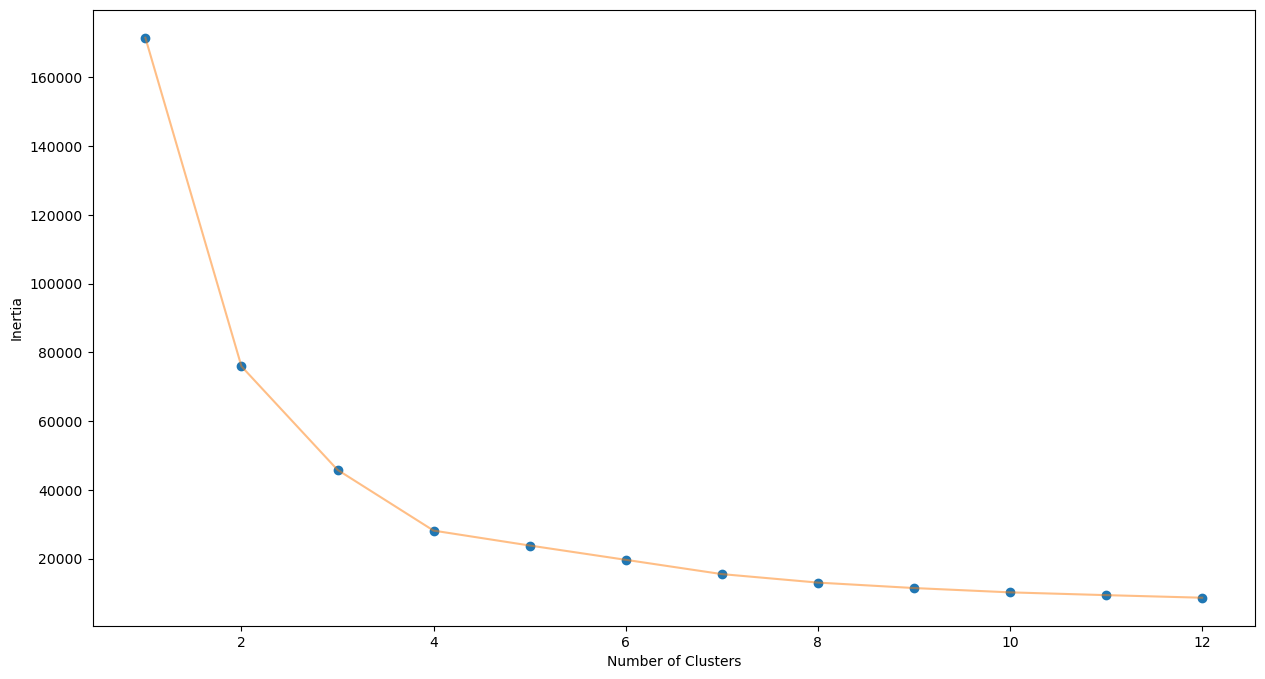

In [25]:
plt.figure(1 , figsize = (15 ,8))
plt.plot(np.arange(1 , 13) , inertia , 'o')
plt.plot(np.arange(1 , 13) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

<b>NOTE:  Pick the  elbow shape  with the lower inerta  which is the compactness level. In the above it is 4 </b>

In [32]:
# apply the number of  cluster to find the  segmentation
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [33]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

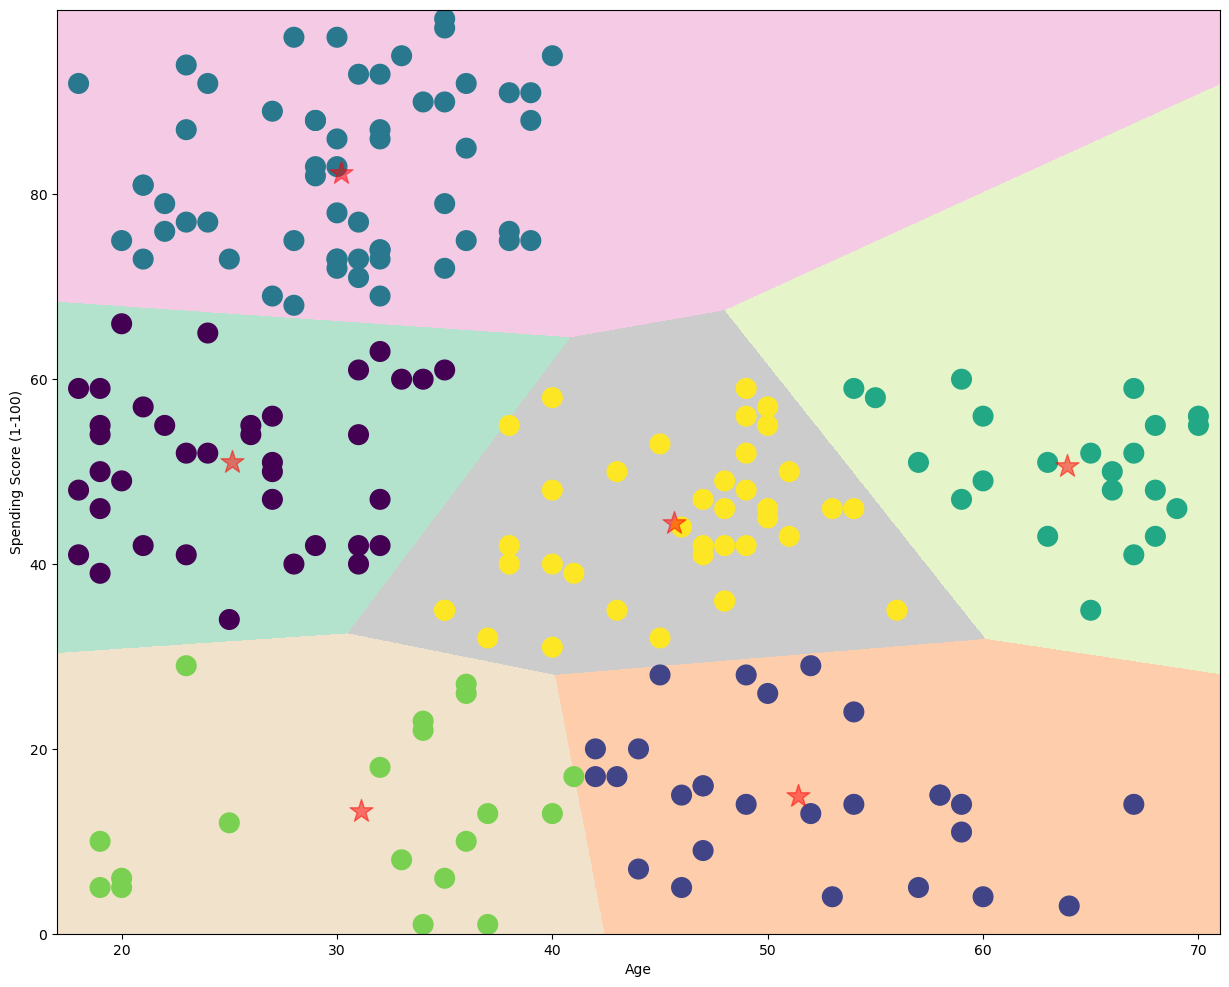

In [34]:
plt.figure(1 , figsize = (15 , 12) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red', marker = "*" , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## Clustering - Univariate , Bivariate , Multivariate

In [35]:
clustering1= KMeans(n_clusters=4)

In [36]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=4)

In [37]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [38]:
df['income cluster']=clustering1.labels_
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
149,150,Male,34,78,90,0
140,141,Female,57,75,5,0
179,180,Male,35,93,90,0
91,92,Male,18,59,41,2
55,56,Male,47,43,41,2
183,184,Female,29,98,88,3
127,128,Male,40,71,95,0
35,36,Female,21,33,81,1
166,167,Male,42,86,20,0
59,60,Male,53,46,46,2


In [ ]:
df['income cluster'].value_counts()

## 2a.  Finding the number of  clusters  in Annual Income and Spending Score


In [53]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Cluster_Labels
105,106,Female,21,62,42,2,0
77,78,Male,40,54,48,2,0
80,81,Male,57,54,51,2,0
180,181,Female,37,97,32,3,1
82,83,Male,67,54,41,2,0
6,7,Female,35,18,6,1,2
132,133,Female,25,72,34,0,0


In [40]:
## Selecting the  columns to use  for  clustering

X = df.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

To find the optimal K value for clustering the data
We are using the Elbow Method to find the optimal K value.
The “init” argument is the method for initializing the centroid.
We calculated the WCSS or inertal value for each K value

In [42]:
from sklearn.cluster import KMeans
wcss = []    
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

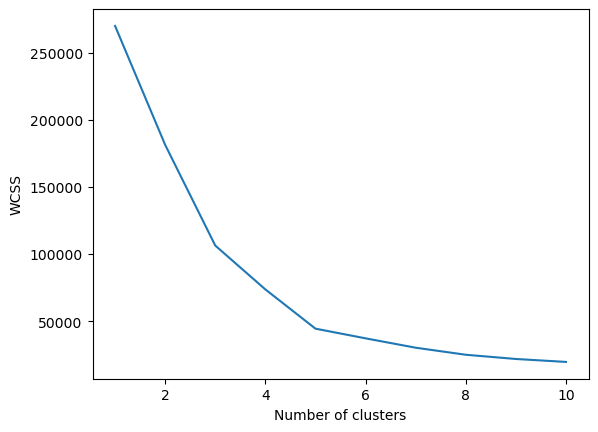

In [43]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#### Train the model
The point at which the elbow shape is created is 5; that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the input data with a number of clusters 5.

In [44]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
y_kmeans 

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [46]:
## Attaching the cluster  to the dataframe

df['Cluster_Labels'] = y_kmeans 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Cluster_Labels
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,2


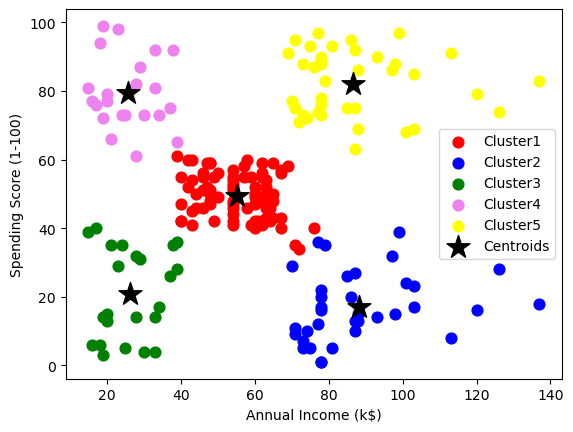

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',marker = '*', label = 'Centroids')
            
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show() 

### 2b.  Finding the number of  clusters  in Annual Income and Spending Score

In [48]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []  #inertia  is sum of squared distances from each point to its cluster centroid across all clusters. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

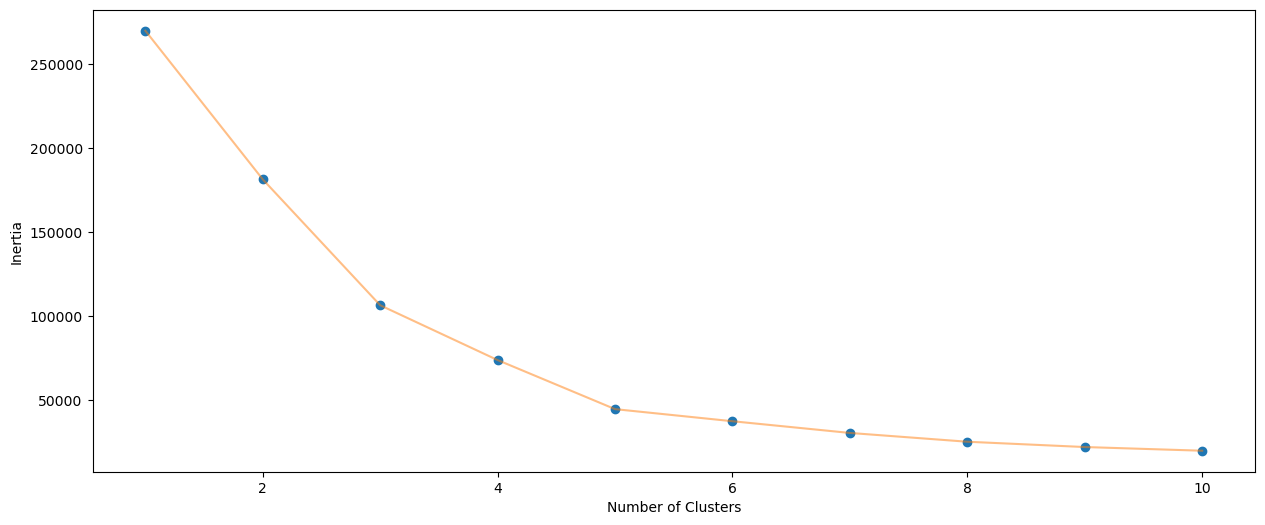

In [49]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Here the elbow is 5 with low inertia  so the number of  clusters  should be 5

In [50]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [51]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

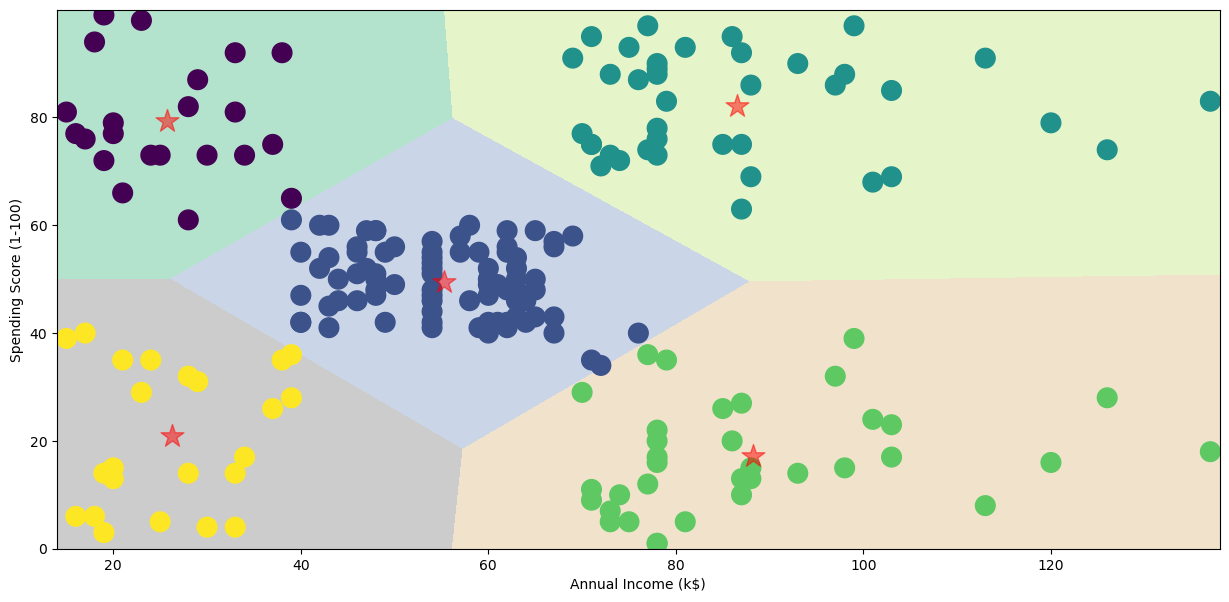

In [52]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data =df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red', marker = '*', alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()